# PREAMBLE

This notebook is walks through the analysis of prey capture behaviors and uses object markers identified by DeepLabCut. The analysis is broken into 8 modules which we will go through over 2 days. There are two main parts to this analysis
1) Loading, reading, and extracting DLC marked objects (Modules 1-4)
2) Plotting data and computing behavioral sequences such as approaches and contacts

See https://doi.org/10.1016/j.cub.2016.09.009 for more information.

We assume no previous Python experience. So, we took a minimalist apporach in terms of python programming patterns. This is not a programing lesson, but rather an exercise of scientific data analysis. So please bear with us if you are already familiar with Python and find the patterns look a bit strange. 

Still, we used a few pythonic patterns so the students can taste what it is like. Knowing Python as a scientist is an asset nowadays! One example is to use map and in-line functions (with lambda keyword). This also serves transparency on the go (you don't have to go back and forth across definitions and files). There is one regular function defined towards the end when inevitable. 

IMPORTANTLY, novices will still have to 'google (or what not)' any concepts of python if new to them, since we do not explain basic python stuff. To help with that, we wrote a few comments in the beginning of each sub-module to mention what python stuff is involved. You can use them as search keywords. 

MORE IMPORTANTLY, We recommend students to prioritize science over programing. Science, in this document, means visualizing and examining the data, computing results, and understanding what is decided and why. Exploration is encouraged - to help with that, we wrote some suggested to-do's and questions.

Good luck!

KC and AK
May 17, 2021



# MODULE 1. SET FILE PATH/NAMES
##   Python exercises:
1. To use 'import' for modules/packages
2. To use string objects (ft. replace method)
3. To find files (using glob module)
4. To write a for-loop with range and use lists (of strings) with indexing
5. To print strings

## MODULE 1(1) SET DATA DIRECTORY PATH AND FIND FILES BY THEIR EXTENSION (CSV and MP4)

In [40]:
import glob

data_dir_path = "/home/swamylab/Documents/Ibro/Videos/csv files catherine/"
##"D:\\Kuwook\\ibro_summerschool_2021\\"
csv_file_paths = glob.glob(data_dir_path + '*.csv') # whether double quote or single quote doesn't matter
mov_file_paths = glob.glob(data_dir_path + '*.avi')

a_list = csv_file_paths
b_list = mov_file_paths

order = [3, 1, 0, 2]
order_mov = [2, 1, 3, 0]
a_list = [a_list[i] for i in order]
b_list = [b_list[i] for i in order_mov]

### print the file names
for fi in range(len(csv_file_paths)):
    print("Session Index {0}".format(fi) )
    print("\t DLC   file name = {0}".format(a_list[fi].replace(data_dir_path,"")))
    print("\t Movie file name = {0}".format(b_list[fi].replace(data_dir_path,"")))


Session Index 0
	 DLC   file name = 1778_March 26.csv
	 Movie file name = 1778_March 26.avi
Session Index 1
	 DLC   file name = 1778_March 27.csv
	 Movie file name = 1778_March 27.avi
Session Index 2
	 DLC   file name = 1778_March 28.csv
	 Movie file name = 1778_March 28.avi
Session Index 3
	 DLC   file name = 1778_March 29.csv
	 Movie file name = 1778_March 29.avi


# MODULE 2. LOAD MOVIE AND DISPLAY IT 
#   Python exercises:
1. To use lists (of strings)
2. To print strings

## MODULE 2(1) CHOOSE SESSION INDEX

In [41]:
csv_file_paths = a_list
mov_file_paths = b_list

current_session_index = 0
current_mov_file_path = mov_file_paths[current_session_index]

print("You chose session index {0}".format(current_session_index))
print("\t Movie file path is {0}".format(current_mov_file_path))

You chose session index 0
	 Movie file path is /home/swamylab/Documents/Ibro/Videos/csv files catherine/1778_March 26.avi


## MODULE 2(2) READ MOVIE (FT. IMAGEIO)
###   Python exercises:
1. To use imageio module to read a movie file (mp4)
2. To append list items 
3. To get the length of a list

In [42]:
import imageio #_ffmpeg

print('Reading {0}'.format(current_mov_file_path))
reader = imageio.get_reader(current_mov_file_path)
mov_frame_images = []
for f in reader:
    mov_frame_images.append(f)
reader.close()

mov_frame_images = tuple(mov_frame_images)

num_frames = len(mov_frame_images)
print("...Done: {0} frames read.".format(num_frames))

Reading /home/swamylab/Documents/Ibro/Videos/csv files catherine/1778_March 26.avi
...Done: 1800 frames read.


## MODULE 2(3) PLAYBACK MOVIE IN SEGMENTS 
###   This part includes exercises:
1. To use matplotlib.pyplot module for plotting (subplot, axis, title, etc)
2. To turn on %matplotlib nbagg to make figures interactive
3. To use in-line for-loops (how python-ic!)
4. To use for-loops with range

 

     ## TO-DO'S OR QUESTIONS 
     # 0. IN DOING THIS, FEEL FREE TO CHANGE THE NUMBER OF SEGEMENTS,  
     #    FIGURE SIZE, AND SUBPLOT LAYOUT TO DISPLAY THE MOVIE DIFFERENTLY. 
     # 1. PLAY A FEW TIME AND DESCRIBE WHAT IS OBSERVED IN THE VIDEO AS EXPECTED AND THAT AS UNEXPECTED. 
     # 2. IN WHICH SEGMENT OR AROUND WHICH FRAME INDEX IS THE CRICKET THROWN IN THE ARENA? 
     # 3. IN WHICH SEGMENT OR AROUND WHICH FRAME INDEX IS THE CRICKET CAUGHT BY THE MOUSE? 
     # 4. WHAT IS YOUR FIRST IMPRESSION ON THE DLC MARKING? ANYTHING WORRISOME? 
     


<IPython.core.display.Javascript object>


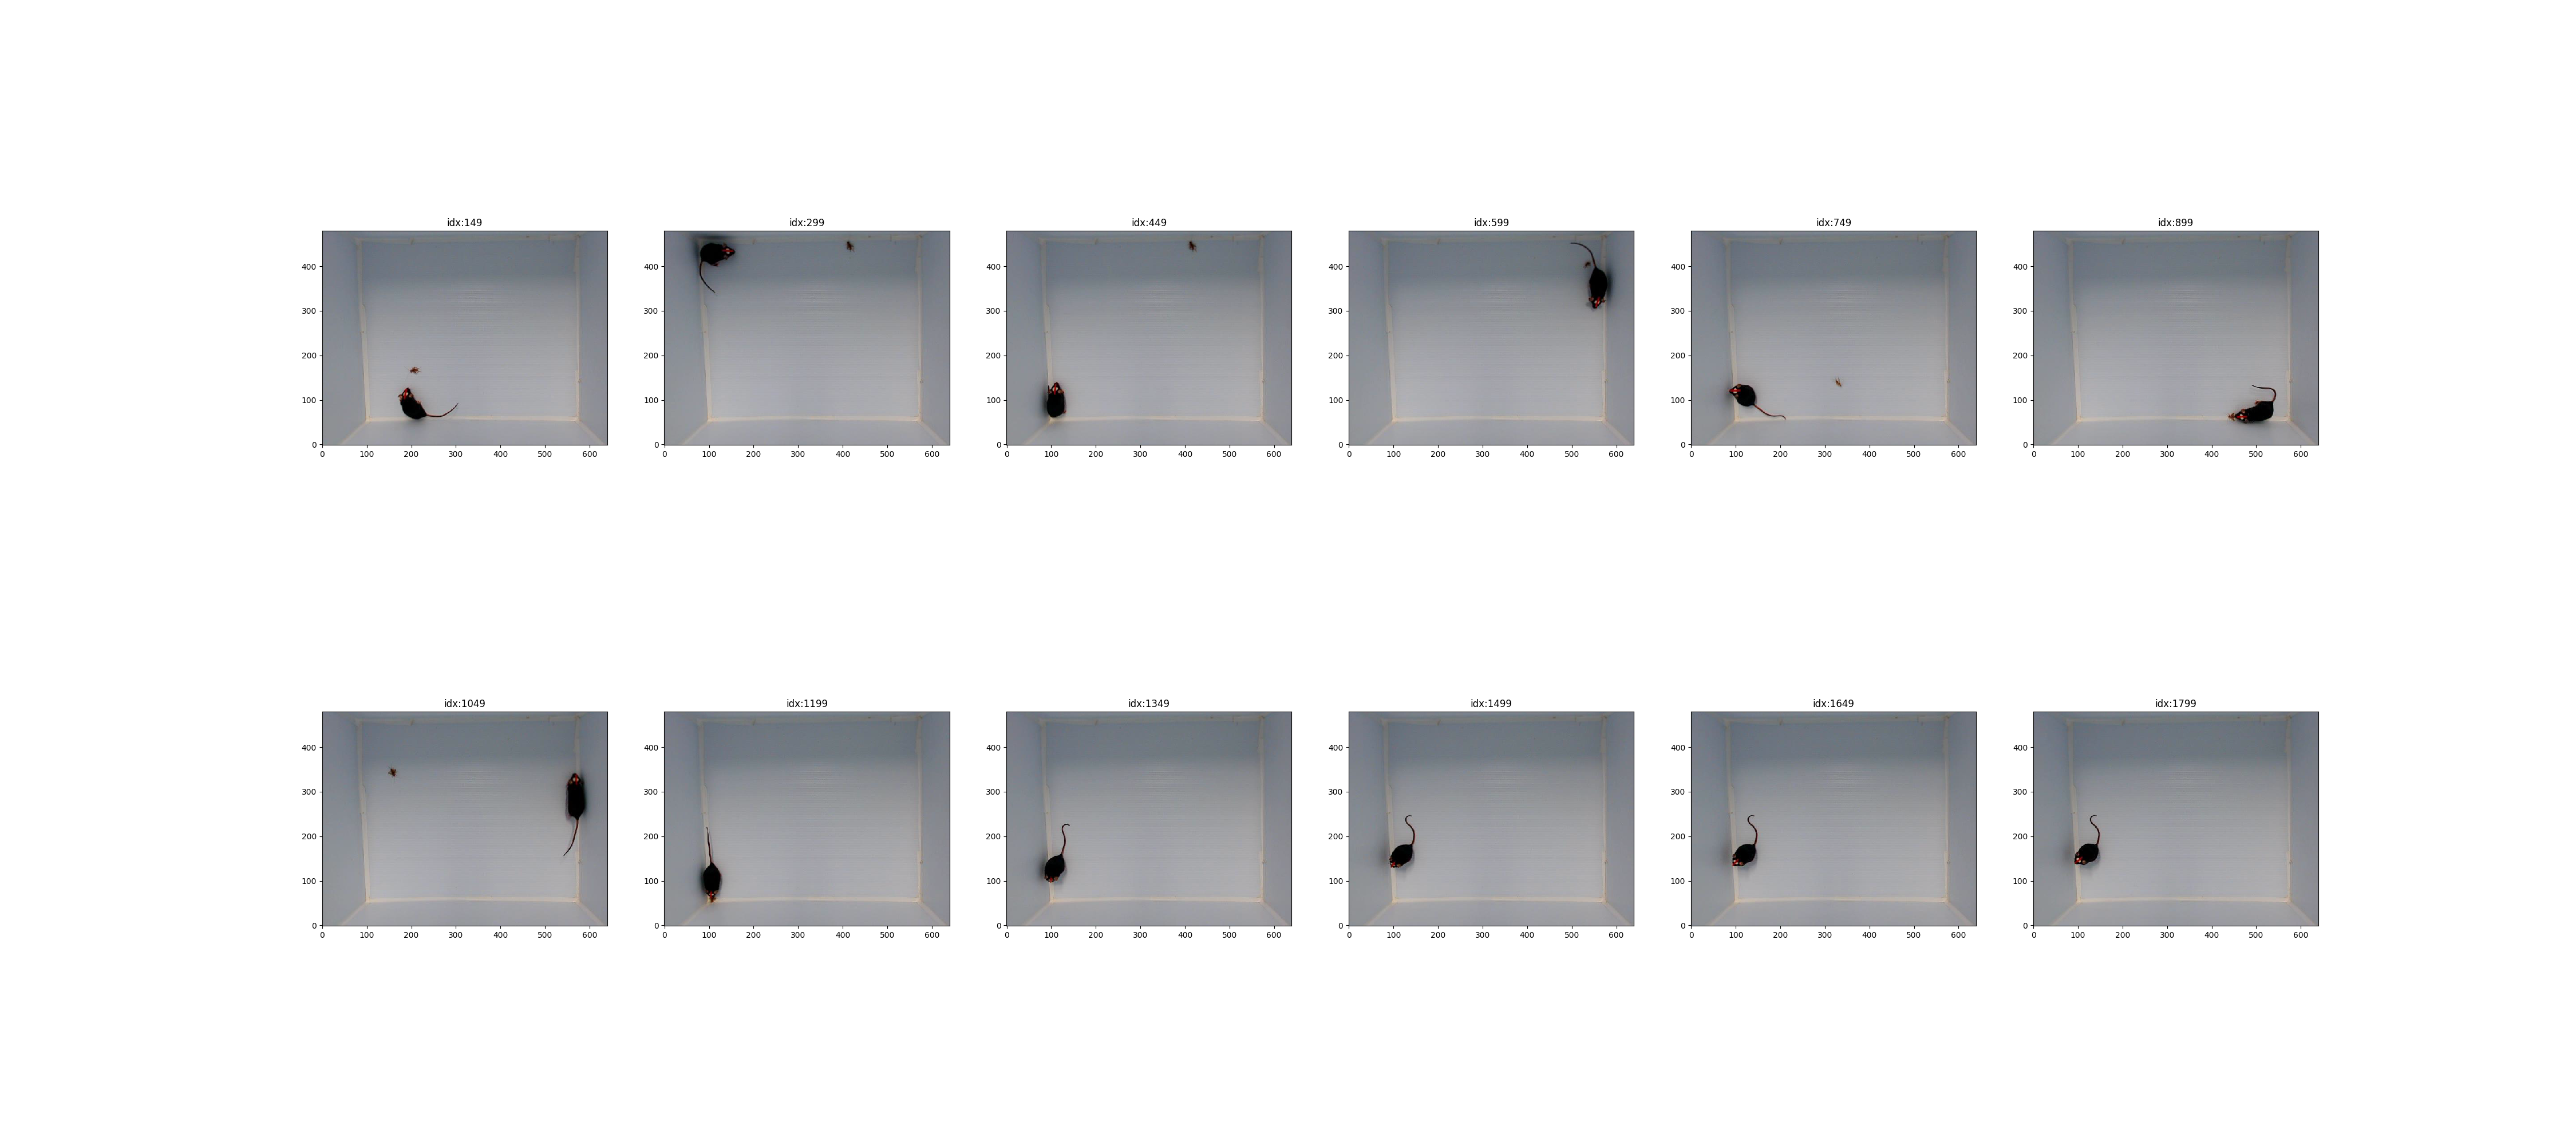

<ipython-input-62-edcdc5145380>:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = matplotlib.pyplot.subplot(2, 6, s+1)


In [62]:
print(" \n\n \
    ## TO-DO'S OR QUESTIONS \n \
    # 0. IN DOING THIS, FEEL FREE TO CHANGE THE NUMBER OF SEGEMENTS,  \n \
    #    FIGURE SIZE, AND SUBPLOT LAYOUT TO DISPLAY THE MOVIE DIFFERENTLY. \n \
    # 1. PLAY A FEW TIME AND DESCRIBE WHAT IS OBSERVED IN THE VIDEO AS EXPECTED AND THAT AS UNEXPECTED. \n \
    # 2. IN WHICH SEGMENT OR AROUND WHICH FRAME INDEX IS THE CRICKET THROWN IN THE ARENA? \n \
    # 3. IN WHICH SEGMENT OR AROUND WHICH FRAME INDEX IS THE CRICKET CAUGHT BY THE MOUSE? \n \
    # 4. WHAT IS YOUR FIRST IMPRESSION ON THE DLC MARKING? ANYTHING WORRISOME? \n \
    ")

import matplotlib.pyplot
%matplotlib nbagg

# Here, we will display the video in plots, divided into 12 segments

num_segments = 12

fig = matplotlib.pyplot.figure(figsize=(45,20))
for i in range(int(num_frames/num_segments)):  # for each frame within a segment
    for s in range(0, num_segments):           # for each segment
        current_frame_index = int(num_frames/num_segments)*s + i   # the frame index to show at this moment (i) 
                                                                    # within each segment (s)
        img = mov_frame_images[current_frame_index]     # we already have mov_frame_images from module 2(2)
    
        axes = matplotlib.pyplot.subplot(2, 6, s+1)
        matplotlib.pyplot.cla()   # probably better to clear to prevent memory-clogging
        matplotlib.pyplot.imshow(img, origin='lower')   # origin='lower' allows a cartesian view w.r.t dlc's x,y positions
        matplotlib.pyplot.axis('on') # if you turn this on and see x,y ticks, you will know what catesian view means
        matplotlib.pyplot.title("idx:{0}".format(current_frame_index))
        
    fig.canvas.draw() # to draw on-line
    

## Student responses
1. PLAY A FEW TIME AND DESCRIBE WHAT IS OBSERVED IN THE VIDEO AS EXPECTED AND THAT AS UNEXPECTED. 


2. IN WHICH SEGMENT OR AROUND WHICH FRAME INDEX IS THE CRICKET THROWN IN THE ARENA? 


3. IN WHICH SEGMENT OR AROUND WHICH FRAME INDEX IS THE CRICKET CAUGHT BY THE MOUSE? 


4. WHAT IS YOUR FIRST IMPRESSION ON THE DLC MARKING? ANYTHING WORRISOME? 
    


# MODULE 3. READ DLC CSV FILE
##   Python exercises:
1. To use lists (of strings)
2. To print strings

## MODULE 3(1) CHOOSE SESSION INDEX

In [63]:
#current_session_index = 0  #already chosen in module 2
#current_mov_file_path = mov_file_paths[current_session_index]  #already chosen in module 2 
current_csv_file_path = csv_file_paths[current_session_index]

print("You chose session index {0}!\n".format(current_session_index))
print("CSV file path:\n {0}\n".format(current_csv_file_path))
print("Movie file path:\n {0}\n".format(current_mov_file_path))
#print("\n")

You chose session index 0!

CSV file path:
 /home/swamylab/Documents/Ibro/Videos/csv files catherine/1778_March 26.csv

Movie file path:
 /home/swamylab/Documents/Ibro/Videos/csv files catherine/1778_March 26.avi



## MODULE 3(2)  READ CSV FILE
#   Python exercises:
1. To use csv module to read a csv file (a pattern using reader object)
2. To use in-line for-loops (how python-ic!)
3. To print strings or variable data

In [64]:
import csv 

print("Reading {0}".format(current_csv_file_path))
with open(current_csv_file_path) as csvfile:
    reader = csv.reader(csvfile)   
    csv_data = tuple([tuple(each_row) for each_row in reader])
csvfile.close()
print("...Done: len(csv_data)={0}".format(len(csv_data)))


print(" \n \
    ## TO-DO'S OR QUESTIONS \n \
    # 0. OPEN THE CSV FILE USING A SUITABLE APPLICATION (e.g., Libre Office Calc) \n \
    #    AND UNDERSTAND HOW csv_data IS ORGANIZED. \n \
    # 1. HOW WOULD YOU EXTRACT DATA OF X POSITIONS OF LE? \
    \n")

# MODIFY THIS TO PRINT EACH ELEMENT SEPEARATELY:
print('*Note that we here only print first 10 elements in each embedded tuple.\n')
for i in range(len(csv_data)):
    print('csv_data[{0}][:10]:'.format(i))
    print(csv_data[i][:10])
    #print(' ** Delete this line and write adequate code') # write a line here
    print('\n')

Reading /home/swamylab/Documents/Ibro/Videos/csv files catherine/1778_March 26.csv
...Done: len(csv_data)=1803
 
     ## TO-DO'S OR QUESTIONS 
     # 0. OPEN THE CSV FILE USING A SUITABLE APPLICATION (e.g., Libre Office Calc) 
     #    AND UNDERSTAND HOW csv_data IS ORGANIZED. 
     # 1. HOW WOULD YOU EXTRACT DATA OF X POSITIONS OF LE?     

*Note that we here only print first 10 elements in each embedded tuple.

csv_data[0][:10]:
('scorer', 'DLC_resnet50_CricketHuntv2Sep29shuffle1_1030000', 'DLC_resnet50_CricketHuntv2Sep29shuffle1_1030000', 'DLC_resnet50_CricketHuntv2Sep29shuffle1_1030000', 'DLC_resnet50_CricketHuntv2Sep29shuffle1_1030000', 'DLC_resnet50_CricketHuntv2Sep29shuffle1_1030000', 'DLC_resnet50_CricketHuntv2Sep29shuffle1_1030000', 'DLC_resnet50_CricketHuntv2Sep29shuffle1_1030000', 'DLC_resnet50_CricketHuntv2Sep29shuffle1_1030000', 'DLC_resnet50_CricketHuntv2Sep29shuffle1_1030000')


csv_data[1][:10]:
('bodyparts', 'RE', 'RE', 'RE', 'LE', 'LE', 'LE', 'NO', 'NO', 'NO')


csv_

# Module 4. EXTRACT/ORGANIZE DLC DATA

## MODULE 4(1) RE-ORGANIZE THE DATA BY COLUMN
##   Python exercises:
1. To use dictionaries and tuples 
2. To use lambda (inline function)
3. To use map 

From the above part, we know that csv_data has the object aliases (e.g., LE, RE, etc.) in its second element (index=1), and the name of the estimates (e.g., x, y, and likelihood) for each object in its third element (index=2). We are also excluding the first column as it does not contain actually data values. For this, we use 'slicing' by colons (:). Below, e.g., csv_data[1][1:] means we first take the second list element of csv_data and then, within the element, slice the list from the second element to the end of the embedded list. Finally, we make a dict object csv_header with keys of aliases and fieldnames

In [66]:
csv_header = {'aliases': tuple(csv_data[1][1:]), 'fieldnames': tuple(csv_data[2][1:])}

# Let's look into csv_header
print('csv_header has a tuple of values for the key aliases as follows:')
print(csv_header['aliases'])
print('\n')
print('csv_header has a tuple of values for the key fieldnames as follows:')
print(csv_header['fieldnames'])
print('\n')
print('And if you print csv_header as a whole to see the structure in it:')
print(csv_header)
print('\n')

csv_header has a tuple of values for the key aliases as follows:
('RE', 'RE', 'RE', 'LE', 'LE', 'LE', 'NO', 'NO', 'NO', 'T', 'T', 'T', 'CR', 'CR', 'CR')


csv_header has a tuple of values for the key fieldnames as follows:
('x', 'y', 'likelihood', 'x', 'y', 'likelihood', 'x', 'y', 'likelihood', 'x', 'y', 'likelihood', 'x', 'y', 'likelihood')


And if you print csv_header as a whole to see the structure in it:
{'aliases': ('RE', 'RE', 'RE', 'LE', 'LE', 'LE', 'NO', 'NO', 'NO', 'T', 'T', 'T', 'CR', 'CR', 'CR'), 'fieldnames': ('x', 'y', 'likelihood', 'x', 'y', 'likelihood', 'x', 'y', 'likelihood', 'x', 'y', 'likelihood', 'x', 'y', 'likelihood')}




csv_data is organized such that each element is each row from the csv file. It makes it hard to do columnwise data extraction so it'd be helpful if we re-organize it.

First, let's practice extracting data from one specific column (the first column). We will use a simple map pattern with lambda keyword. Lamba is essentially a inline function keyword. for instance 'lambda variable1, variable2: x+y' is a function that takes 2 variables and adds them. Below we have a function, 'lambda row: row[0]', that simply takes the first element of a list. 

*Note that the 'row' here does not mean the row of the list since list does not have rows or columns, but it's for the row of original csv data. Map is a function that applies a function to every element of an iterable (or multiple iterables). 

Below, map is taking csv_data and applying the lamba function to every element. As a result, the lambda function will take the first (index=0) element, which is the first column of the original csv data, iterably for each of the elements of csv_data, which is each row of the original csv data. The reult is saved as a map object which is abstract and needs to be converted something operable, and we here convert it as a tuple of all results.

In [8]:
csv_col0 = tuple(map(lambda row: row[0], csv_data)) 
start_frame_index = csv_col0.index('0') # And we find the index where '0' frame start which also indicates 
                                        # where the data values start

# The above map/lambda code is only for a specific element (1st column). 
# Now, let's make a more general lambda function for that. Namely, we call this function 
#  as 'myextractcsvcolumn' and it takes some_csv_data and col_idx as inputs, 
#  where the first is a list with the same structure as our csv_data and 
#  the latter is the index of the column that we want to extract
myextractcsvcolumn = lambda some_csv_data, col_idx: tuple(map(lambda row: row[col_idx], some_csv_data)) 
print(myextractcsvcolumn(csv_data,2))  # try this if you want to confirm that it will give you the 3rd column of
                                         # the data
    
# Finally, we can use another map function to extract many columns at once and save the data as a tuple
num_columns = len(csv_data[0])  # Obviously!
col_indices = range(1, num_columns) # we here exclude the first column (index=0) as we decided above
csv_values = tuple(map(lambda col_idx: 
                       myextractcsvcolumn(csv_data[start_frame_index:], col_idx),
                       col_indices))
# Note that we only pass csv_data sliced from start_frame_index where actual data values start

# We have a tuple of tuples each of which is a column of the csv data.
# Let's confirm what we did 
print('If you print the first three values of the first column:')
print(csv_values[0][0:3])
print('\n')
print('If you print the last four values of the third column:')
print(csv_values[2][-4:])

If you print the first three values of the first column:
('563.3883666992188', '564.483154296875', '565.0083618164062')


If you print the last four values of the third column:
('1.0', '1.0', '1.0', '1.0')


In [70]:
print('If you print the first three values of the first column:')
print(csv_values[0][0:3])
print('\n')
print('If you print the last four values of the third column:')
print(csv_values[2][-4:])

If you print the first three values of the first column:
('571.2357788085938', '571.5045776367188', '570.1707153320312')


If you print the last four values of the third column:
('1.0', '1.0', '1.0', '1.0')


## MODULE 4(2) STORE THE DATA AS A DICTIONARY
##   Python exercises:
1. To use dictionaries
2. To use lambda (inline function) and map
3. To use .index() function for iterables

We will create an dict object, dlc_object_data, which associates keys of object aliases and their data. Since each object has three fields (x,y, and likelihood), we will populate a dict object that has the three keys. So, we will be able to access the csv data by dlc_object_data[alias][fieldname]. E.g, if we want to get the x position of LE, it would be dlc_object_data['LE']['x'].

In [75]:
alias_set = set(csv_header['aliases'])
fieldname_set = set(csv_header['fieldnames'])

dlc_object_data = dict([]) # initialize the variable as a dict object
for alias in alias_set:        
    dlc_object_data[str(alias)] = dict([]) # initialize each key with a dict object as its value
    for fieldname in fieldname_set:
        # boolean tuples to indicate if each column meets the condition (alias/fieldname matching)
        match_alias = tuple(map(lambda hdr_elm: hdr_elm == alias, csv_header['aliases'])) 
        match_fieldname = tuple(map(lambda hdr_elm: hdr_elm == fieldname, csv_header['fieldnames']))
        
        match_both = tuple(map(lambda m1,m2: m1 == True & m2 == True, match_alias, match_fieldname))
        col_idx = match_both.index(True)  # .index(True) returns the FIRST index whose value is True
        
        # We need to convert each string element to float
        dlc_object_data[alias][fieldname] = tuple(map(lambda str: float(str), csv_values[col_idx]))

# Now, let's check what we have
print('What are the last 5 x positions of the mouse tail?')
print("dlc_object_data['T']['x'] = ")
print(dlc_object_data['T']['x'][-5:])
print('\n')
print('What are the last 5 x positions of the cricket?')
print("dlc_object_data['CR']['x'] = ")
print(dlc_object_data['CR']['x'][-5:])

What are the last 5 x positions of the mouse tail?
dlc_object_data['T']['x'] = 
(135.46803283691406, 135.853271484375, 135.82308959960938, 135.89712524414062, 136.00543212890625)


What are the last 5 x positions of the cricket?
dlc_object_data['CR']['x'] = 
(133.60948181152344, 133.56007385253906, 133.41661071777344, 133.7498016357422, 133.955078125)


In [78]:
print('What are the last 5 x positions of the mouse tail?')
print("dlc_object_data['T']['x'] = ")
print(dlc_object_data['T']['y'][-10:])
print('\n')
print('What are the last 5 x positions of the cricket?')
print("dlc_object_data['CR']['x'] = ")
print(dlc_object_data['CR']['x'][-5:])

What are the last 5 x positions of the mouse tail?
dlc_object_data['T']['x'] = 
(243.1646270751953, 243.9396514892578, 243.84100341796875, 243.8442840576172, 243.9725341796875, 243.77967834472656, 244.15252685546875, 244.01614379882812, 243.62677001953125, 244.12530517578125)


What are the last 5 x positions of the cricket?
dlc_object_data['CR']['x'] = 
(133.60948181152344, 133.56007385253906, 133.41661071777344, 133.7498016357422, 133.955078125)


## MODULE 4(3) PREPARE POSITION AND LIKELIHOOD VARIABLES
##   Python exercises:
1. To use numpy
2. To use dictionary and zip

We will store x,y positions as one variable called (object name)_positions, and likelihoods as (object name)_likelihoods (object name)_positions is a dictonary of two keys of x and y, whos values are numpy vertical arrays (frames x 1). (object name)_likelihoods is simple numpy vertical array (frames x 1). We combine left and right ears as head. 

In [79]:
import numpy

cricket_positions = [numpy.vstack(dlc_object_data['CR'].get(key)) for key in ('x', 'y')]
cricket_positions = dict(zip(('x', 'y'), cricket_positions))
cricket_likelihoods = numpy.vstack(dlc_object_data['CR']['likelihood'])

nose_positions = [numpy.vstack(dlc_object_data['NO'].get(key)) for key in ('x', 'y')]
nose_positions = dict(zip(('x', 'y'), nose_positions))
nose_likelihoods = numpy.vstack(dlc_object_data['NO']['likelihood'])

head_positions = list(map(lambda le,re: le/2+re/2, \
                    [numpy.vstack(dlc_object_data['LE'].get(key)) for key in ('x', 'y')], \
                    [numpy.vstack(dlc_object_data['RE'].get(key)) for key in ('x', 'y')]))
head_positions = dict(zip(('x', 'y'), head_positions))
head_likelihoods = numpy.vstack(dlc_object_data['LE']['likelihood'])*numpy.vstack(dlc_object_data['RE']['likelihood'])

#tail_positions = [numpy.vstack(obj_data['T'].get(key)) for key in ('x', 'y')]
#tail_positions = dict(zip(['x', 'y'], tail_positions))
#tail_likelihoods = numpy.vstack(obj_data['T']['likelihood'])

# Let's check them out
print("Let's look at cricket x positions.")
print("cricket_positions['x']: ")
print(cricket_positions['x'])
print('\n')
print("len(cricket_positions['x']) = {0}".format(len(cricket_positions['x'])))
print("cricket_positions['x'].shape = {0}".format(cricket_positions['x'].shape))
print('\n')
print('However:')
print("len(cricket_positions) = {0}".format(len(cricket_positions)))

Let's look at cricket x positions.
cricket_positions['x']: 
[[593.96032715]
 [590.97790527]
 [586.25042725]
 ...
 [133.41661072]
 [133.74980164]
 [133.95507812]]


len(cricket_positions['x']) = 1800
cricket_positions['x'].shape = (1800, 1)


However:
len(cricket_positions) = 2


# MODULE 5. OBSERVE DLC DATA

## MODULE 5(1) MAKE TIME-SERIES AND TRAJECTORY PLOTS, AND MARK OBJECT POSITIONS IN VIDEO
## Python exercises:
1. To use matplotlib.pyplot

 
     ## TO-DO'S OR QUESTIONS 
     # 1. ARE HEAD AND NOSE POSITIONS WELL IDENTIFIED? WHAT IS THE EVIDENCE FOR YOUR ANSWER? 
     # 2. ARE CRICKET POSITIONS WELL IDENDIFIED? WHAT IS THE EVIDENCE FOR YOUR ANSWER? 
     # 3. WHAT DO YOU THINK THE FLUCTUATIONS OF cricket_likelihood INDICATES? 
     


<IPython.core.display.Javascript object>


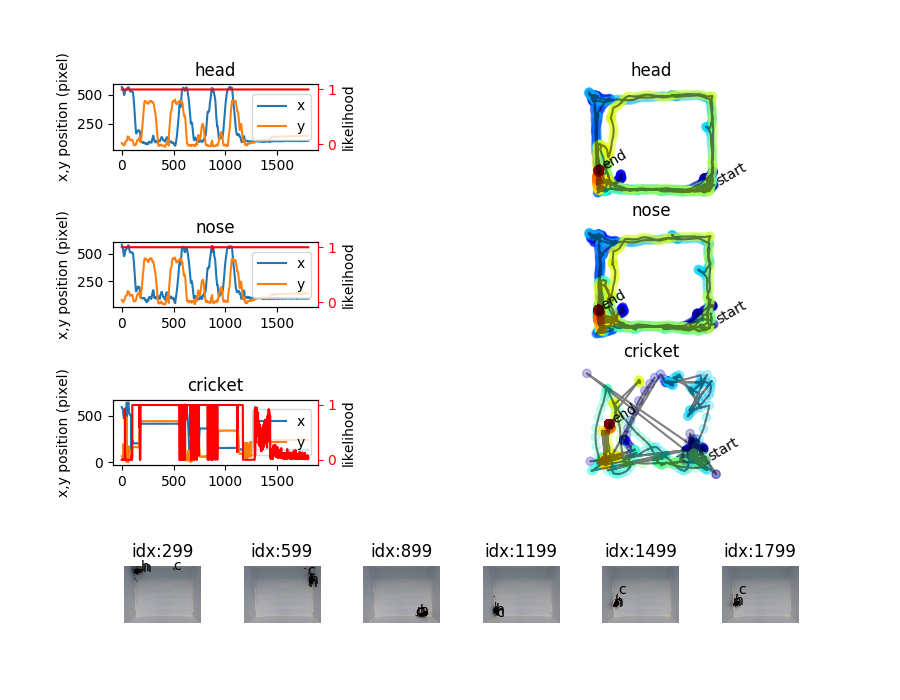

<ipython-input-81-aaa3a691ac37>:54: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  matplotlib.pyplot.subplot(8, num_segments, s+1 + num_segments*7)


In [81]:
print(" \n \
    ## TO-DO'S OR QUESTIONS \n \
    # 1. ARE HEAD AND NOSE POSITIONS WELL IDENTIFIED? WHAT IS THE EVIDENCE FOR YOUR ANSWER? \n \
    # 2. ARE CRICKET POSITIONS WELL IDENDIFIED? WHAT IS THE EVIDENCE FOR YOUR ANSWER? \n \
    # 3. WHAT DO YOU THINK THE FLUCTUATIONS OF cricket_likelihood INDICATES? \n \
    ")

fig = matplotlib.pyplot.figure(figsize=(9,7))

variable_prefixes = ('head_', 'nose_', 'cricket_')

for v_i in range(len(variable_prefixes)):
    
    matplotlib.pyplot.subplot(7, 3, 1 + v_i*6)
    x = eval(variable_prefixes[v_i] + "positions['x']")
    y = eval(variable_prefixes[v_i] + "positions['y']")
    lik = eval(variable_prefixes[v_i] + "likelihoods")
    
    matplotlib.pyplot.plot(x)
    matplotlib.pyplot.plot(y)
    matplotlib.pyplot.ylabel('x,y position (pixel)')
    matplotlib.pyplot.legend(['x', 'y'], loc='right')
    matplotlib.pyplot.title(variable_prefixes[v_i][:-1])

    matplotlib.pyplot.gca().twinx()
    matplotlib.pyplot.plot(lik, 'r-')
    matplotlib.pyplot.ylabel('likelihood')
    matplotlib.pyplot.gca().spines['right'].set_color('r')
    matplotlib.pyplot.gca().tick_params(axis = 'y', colors = 'r')
    matplotlib.pyplot.ylim(-0.1,1.1)
    
    # plot trajectories
    matplotlib.pyplot.subplot(4, 2, 2 + v_i*2)
    num_points = len(x)
    matplotlib.pyplot.plot(x,y,  color='k', alpha=0.5)
    matplotlib.pyplot.text(x[0],y[0], 'start', color='k', rotation=30)
    matplotlib.pyplot.text(x[-1],y[-1], 'end', color='k', rotation=30)
    matplotlib.pyplot.scatter(x,y, c= numpy.vstack(range(num_points)), cmap = 'jet', alpha = 0.25)
    #matplotlib.pyplot.scatter(x,y,  c= list(range(num_points)), cmap = 'jet', alpha = 0.25)
    matplotlib.pyplot.axis('equal')
    matplotlib.pyplot.axis('off')  
    matplotlib.pyplot.title(variable_prefixes[v_i][:-1])

fig.canvas.draw()
    
num_segments = 6

#fig = matplotlib.pyplot.figure(figsize=(9,2))
for i in range(int(num_frames/num_segments)):
    for s in range(0, num_segments):        
        current_frame_index = int(num_frames/num_segments)*s + i
        img = mov_frame_images[current_frame_index]
                
        matplotlib.pyplot.subplot(8, num_segments, s+1 + num_segments*7)
        matplotlib.pyplot.cla()
        matplotlib.pyplot.imshow(img, origin='lower')
        matplotlib.pyplot.axis('off')
        matplotlib.pyplot.title("idx:{0}".format(current_frame_index))
        
        matplotlib.pyplot.text(cricket_positions['x'][current_frame_index], 
                               cricket_positions['y'][current_frame_index], 'c')
        matplotlib.pyplot.text(nose_positions['x'][current_frame_index], 
                               nose_positions['y'][current_frame_index], 'n')
        matplotlib.pyplot.text(head_positions['x'][current_frame_index], 
                               head_positions['y'][current_frame_index], 'h')        
        
    fig.canvas.draw()

    ## Student responses
    1. ARE HEAD AND NOSE POSITIONS WELL IDENTIFIED? WHAT IS THE EVIDENCE FOR YOUR ANSWER? 
    
    2. ARE CRICKET POSITIONS WELL IDENDIFIED? WHAT IS THE EVIDENCE FOR YOUR ANSWER?
    
    3. WHAT DO YOU THINK THE FLUCTUATIONS OF cricket_likelihood INDICATES? 
    

# Module 6. COMPUTE RANGE AND AZIMUTH
## MODULE 6(1) COMPUTE RANGE AND AZIMUTH
##   Python exercises:
1. To use inline functions (lambda keyword)
2. To make a dict object with zip
3. To use dict objects
4. To use numpy functions


### range: 
range is simply the distance between the mouse nose and cricket

In [84]:
mycomputedistance = lambda p1, p2: numpy.sqrt((p1['x']-p2['x'])**2 + (p1['y']-p2['y'])**2)
ranges = mycomputedistance(cricket_positions, nose_positions)
range_likelihoods = cricket_likelihoods*nose_likelihoods

In [86]:
mycomputedistance = lambda p1, p2: numpy.sqrt((p1['x']-p2['x'])**2 + (p1['y']-p2['y'])**2)

### azimuth 
azimuth is an angular measurement of the cricket location with respect to the orientation of the mouse head. A possible geometric definition is the angular deviation of the vector of head-to-cricket displacement from the vector of head-to-nose displacement https://stackoverflow.com/questions/14066933/direct-way-of-computing-clockwise-angle-between-2-vectors/16544330#16544330


In [87]:
mycomputedisplacement = lambda v0,v1: dict(zip(('x', 'y'), (v1['x']-v0['x'], v1['y']-v0['y'])))
v1 = mycomputedisplacement(head_positions, nose_positions) # vectors from head to nose 
v2 = mycomputedisplacement(head_positions, cricket_positions) # vectors from head to cricket
cos = v1['x']*v2['x'] + v1['y']*v2['y']  # dot product or cosine between v1 and v2
sin = v1['x']*v2['y'] - v1['y']*v2['x']  # determinant or sine between v1 and v2
azimuths = numpy.arctan2(sin, cos)  # atan2(y, x) or atan2(sin, cos)
abs_azimuths = numpy.arccos(numpy.cos(azimuths))
abs_azimuths_alternative = numpy.abs(azimuths)

# wrong computations of azimuths
cos = cricket_positions['x']*nose_positions['x'] - cricket_positions['y']*nose_positions['y']  
sin = cricket_positions['x']*nose_positions['y'] - nose_positions['x']*cricket_positions['y']  
azimuths_wrong = numpy.arctan2(sin, cos)  # atan2(y, x) or atan2(sin, cos)

# other wrong ways
# azimuths_wrong = numpy.arctan2(cricket_positions['y']-nose_positions['y'], cricket_positions['x']-nose_positions['x'])  
# azimuths_wrong = numpy.arctan2(v2['y']-v1['y'], v2['x']-v1['x'])  

print('Range and azimuth are computed. Plot them in the next cell.')

Range and azimuth are computed. Plot them in the next cell.


## MODULE 6(2) PLOT RANGE AND AZIMUTHS AND EXAMINE THEM ALONG WITH VIDEO
#   Python exercises:
1. To use matplotlib.pyplot
2. To use numpy

 
     ## TO-DO'S OR QUESTIONS 
     # 1. OBSERVE TRANSIENT CHANGES IN THE RANGE PLOT. WHAT DO YOU THINK THESE COME FROM?  
     # 2. OBSERVE TRANSIENT CHANGES IN THE AZIMUTH PLOT. WHAT DO YOU THINK THESE COME FROM? 
     # 3. OBSERVE FRAMES FROM 800 TO 1000 IN THE AZIMUTH PLOT. WHAT DO YOU CAUSES THIS? 
     #    WHAT WOULD BE POTENTIAL PROBLEMS IN USING AZIMUTH FOR FURTHER ANALYSIS? 
     # 4. OBSERVE azimuths_wrong IN THE AZIMUTH PLOT. EXPLAIN WHY THIS WENT WRONG OR 
     #     DESCRIBE WHAT IT REPRESENTS 
     



<IPython.core.display.Javascript object>


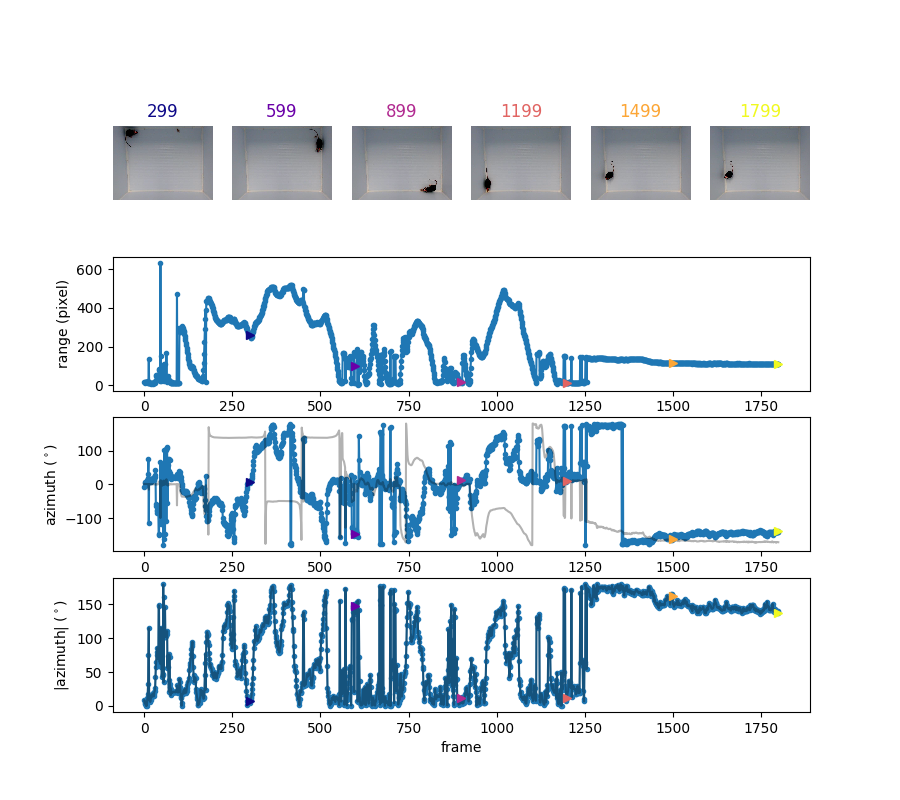

<ipython-input-89-73f55d070bbf>:53: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  matplotlib.pyplot.subplot(4,1,2)
<ipython-input-89-73f55d070bbf>:68: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  matplotlib.pyplot.subplot(4,1,3)
<ipython-input-89-73f55d070bbf>:78: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance w

In [89]:
print(" \n \
    ## TO-DO'S OR QUESTIONS \n \
    # 1. OBSERVE TRANSIENT CHANGES IN THE RANGE PLOT. WHAT DO YOU THINK THESE COME FROM?  \n \
    # 2. OBSERVE TRANSIENT CHANGES IN THE AZIMUTH PLOT. WHAT DO YOU THINK THESE COME FROM? \n \
    # 3. OBSERVE FRAMES FROM 800 TO 1000 IN THE AZIMUTH PLOT. WHAT DO YOU CAUSES THIS? \n \
    #    WHAT WOULD BE POTENTIAL PROBLEMS IN USING AZIMUTH FOR FURTHER ANALYSIS? \n \
    # 4. OBSERVE azimuths_wrong IN THE AZIMUTH PLOT. EXPLAIN WHY THIS WENT WRONG OR \n \
    #     DESCRIBE WHAT IT REPRESENTS \n \
    \n")

num_segments = 6

# we will use colors for each segment
cmap = matplotlib.cm.get_cmap('plasma', num_segments)

fig = matplotlib.pyplot.figure(figsize=(9,8))

# plot ranges at the second top panel
matplotlib.pyplot.subplot(4,1,2)
matplotlib.pyplot.plot(ranges, '.-')
matplotlib.pyplot.ylabel('range (pixel)')

# plot azimuths at the third panel
matplotlib.pyplot.subplot(4,1,3)
matplotlib.pyplot.plot(azimuths*180/numpy.pi, '.-')
matplotlib.pyplot.plot(azimuths_wrong*180/numpy.pi, 'k-', alpha = 0.3)  # we plot the wrong azimuth as 'grey-ish'
matplotlib.pyplot.ylabel('azimuth ($^\circ$)')

# plot |azimuths| at the fourth panel
matplotlib.pyplot.subplot(4,1,4)
matplotlib.pyplot.plot(abs_azimuths*180/numpy.pi, '.-')
matplotlib.pyplot.plot(abs_azimuths_alternative*180/numpy.pi, 'k-', alpha = 0.3) # we plot the alternate as 'grey-ish'
matplotlib.pyplot.ylabel('|azimuth| ($^\circ$)')
matplotlib.pyplot.xlabel('frame')

# show the video segments at the top row frame-by-frame
# and we will mark where the frame is at the ranges, azimuths and |azimuths|
#import warnings
#warnings.filterwarnings('ignore') # if you want to turn off the warnings
for i in range(int(num_frames/num_segments)):
    for s in range(0, num_segments):        
        current_frame_index = int(num_frames/num_segments)*s + i
        img = mov_frame_images[current_frame_index]
                
        matplotlib.pyplot.subplot(4, num_segments, s+1)
        matplotlib.pyplot.cla()
        matplotlib.pyplot.imshow(img, origin='lower')
        matplotlib.pyplot.axis('off')
        matplotlib.pyplot.title(current_frame_index, color=cmap(s))   
                
        # mark ranges plot 
        if i == 0: 
            matplotlib.pyplot.subplot(4,1,2)            
            # We want to mark on-line data points according to the video frame for each segment.
            # So we plot the first point of the segment here, and set gid to update the point
            matplotlib.pyplot.plot(current_frame_index, ranges[current_frame_index], 
                                    '>', color=cmap(s), gid= 'range_seg_' + str(s))   
        else:
            # So, once the first point is plotted above, we update it in following frames.
            # First, find the right plot object by gid
            h = matplotlib.pyplot.gcf().findobj(lambda x: x.get_gid() == 'range_seg_' + str(s))
            # And update the x, y properties
            h[0].set_xdata(current_frame_index)
            h[0].set_ydata(ranges[current_frame_index])
            
        # mark azimuths plot
        if i == 0:
            matplotlib.pyplot.subplot(4,1,3)             
            matplotlib.pyplot.plot(current_frame_index, azimuths[current_frame_index]*180/numpy.pi, 
                                '>', color=cmap(s), gid= 'azimuth_seg_' + str(s))
        else:
            h = matplotlib.pyplot.gcf().findobj(lambda x: x.get_gid() == 'azimuth_seg_' + str(s))
            h[0].set_xdata(current_frame_index)
            h[0].set_ydata(azimuths[current_frame_index]*180/numpy.pi)      
        
        # mark abs_azimuths plot
        if i == 0:
            matplotlib.pyplot.subplot(4,1,4)             
            matplotlib.pyplot.plot(current_frame_index, abs_azimuths[current_frame_index]*180/numpy.pi, 
                                '>', color=cmap(s), gid= 'abs_azimuth_seg_' + str(s))
        else: 
            h = matplotlib.pyplot.gcf().findobj(lambda x: x.get_gid() == 'abs_azimuth_seg_' + str(s))
            h[0].set_xdata(current_frame_index)
            h[0].set_ydata(abs_azimuths[current_frame_index]*180/numpy.pi)      
        
        #matplotlib.pyplot.show()
        
    fig.canvas.draw()

# MODULE 7. FIND APPROACHES AND CONTACTS
## MODULE 7(1) FIND APPROACHES AND CONTACTS
##   Python exercises:
1. To use numpy
2. To use matplotlib.pyplot

Here, we will define approaches and contacts as follows:

Apporaches: the moment where the distance between the range is decreasing (derivative of range <=0) while the mouse is moving (speed >= criterion)

Contacts: the moment where the distance bewteen the range is smaller than a certain distance

In [95]:
is_approach

array([[False],
       [False],
       [ True],
       ...,
       [False],
       [False],
       [False]])

 
     ## TO-DO'S OR QUESTIONS 
     # 1. EVALUATE HOW WELL APPROACHES AND CONTACTS ARE IDENTIFIED.  
     # 2. IDENTIFY/DESCRIBE PROBLEMS SHOWN IN THE PLOT (ZOOM IN IF NECESSARY).
     # 3. TRY SOLVING THE PROBLEMS BY CHANGING THE CRITERIA 
     # 4. WHAT DO YOU THINK CAUSES THESE PROBLEMS (THE 2ND PANEL MIGHT HELP)? 
     # 5. WHAT WOULD YOU DO TO SOLVE THE PROBLEMS? 
     


<IPython.core.display.Javascript object>


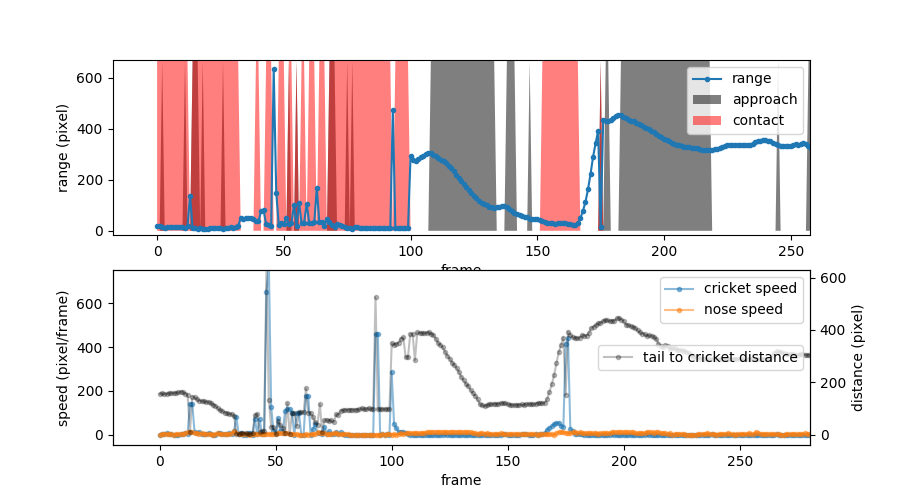

In [96]:
speed_cutoff = 5
range_cutoff = 40

# Compute nose speeds
nose_velocities = {'x': numpy.vstack((0, numpy.diff(nose_positions['x'], axis=0))), 
                      'y': numpy.vstack((0, numpy.diff(nose_positions['y'], axis=0)))}
nose_speeds = numpy.sqrt(nose_velocities['x']**2 + nose_velocities['y']**2) 

# approach & contact
is_approach = (numpy.vstack((0, numpy.diff(ranges, axis=0))) <= 0)  & (nose_speeds >= speed_cutoff)
is_contact = (ranges <= range_cutoff)


# Let's see
print(" \n \
    ## TO-DO'S OR QUESTIONS \n \
    # 1. EVALUATE HOW WELL APPROACHES AND CONTACTS ARE IDENTIFIED.  \n \
    # 2. IDENTIFY/DESCRIBE PROBLEMS SHOWN IN THE PLOT (ZOOM IN IF NECESSARY).\n \
    # 3. TRY SOLVING THE PROBLEMS BY CHANGING THE CRITERIA \n \
    # 4. WHAT DO YOU THINK CAUSES THESE PROBLEMS (THE 2ND PANEL MIGHT HELP)? \n \
    # 5. WHAT WOULD YOU DO TO SOLVE THE PROBLEMS? \n \
    ")

matplotlib.pyplot.figure(figsize = (9,5))
matplotlib.pyplot.subplot(2,1,1)
matplotlib.pyplot.plot(ranges, '.-')
matplotlib.pyplot.ylabel('range (pixel)')
matplotlib.pyplot.xlabel('frame')

bottom, top = matplotlib.pyplot.ylim()
# paint apporaches
matplotlib.pyplot.fill_between(range(0, num_frames), is_approach[:,0]*top, 0, facecolor='k', alpha = 0.5) 
# paint contacts
matplotlib.pyplot.fill_between(range(0, num_frames), is_contact[:,0]*top, 0, facecolor='r', alpha = 0.5)
matplotlib.pyplot.legend(['range', 'approach', 'contact'])

# just to have some ideas, we plot acceleration of cricket and nose
matplotlib.pyplot.subplot(2,1,2)
cricket_velocities = {'x': numpy.vstack((0, numpy.diff(cricket_positions['x'], axis=0))), 
                      'y': numpy.vstack((0, numpy.diff(cricket_positions['y'], axis=0)))}
cricket_speeds = numpy.sqrt(cricket_velocities['x']**2 + cricket_velocities['y']**2)
matplotlib.pyplot.plot(cricket_speeds, '.-', alpha = 0.5)
matplotlib.pyplot.plot(nose_speeds, '.-', alpha = 0.5)

matplotlib.pyplot.legend(['cricket speed', 'nose speed'])
matplotlib.pyplot.ylabel('speed (pixel/frame)')
matplotlib.pyplot.xlabel('frame')

matplotlib.pyplot.gca().twinx()
tail_positions = [numpy.vstack(dlc_object_data['T'].get(key)) for key in ('x', 'y')]
tail_positions = dict(zip(['x', 'y'], tail_positions))
matplotlib.pyplot.plot(mycomputedistance(tail_positions, cricket_positions), 'k.-',alpha = 0.25)
matplotlib.pyplot.ylabel('distance (pixel)')
matplotlib.pyplot.legend(['tail to cricket distance'], loc='right')

fig.canvas.draw()

# MODULE 8. "REDEEM" THE DATA: POST-PROCESSING FOR GOOD
## MODULE 8(1) FIND THE BEGINNING AND END OF HUNTING 
###   Python exercises:
1. To use numpy
2. To use map, lambda, and boolean operations in list and numpy.array
3. To use matplotlib.pyplot

We are almost done! 

### The causes of the above problems we have identified are the following:
1. The cricket is mislocated/misidentified before it was thrown to the arena and after the hunting ended. As a result, the position of the cricket jumps around and is often times located at a corner of the arena
2. The cricket is mislocated/misidentified during the hunting at times that DLC was 'confused' between the tail and the cricket. 
3. Small apparent hesitations in the range lead to discontinuous apporaches (see around frame index = 800).

### Here is a suggested solution.
1. Identify moments where we want to discard the data. Those moments are suggested to include the points:
    
    a. where cricket spees are spiking (so accelaration is larger than a criterion).    
    b. where cricket actually does not exist (i.e., before hunting and after hunting).
    
2. Smooth the data using a filter of the product of a gaussian function, likelihood data and the filter from 1

This will (1) discard the data points we discarded and (2) interpolate the discarded points with neighboring data points with uncertainty of the dlc estimation considered

First, in this part, we will find the begining and end of hunting 

Hunting start
We will find it by setting the frame point as True if the cricket likelihood in the following [window_size] frames
are larger than a criterion. We do the search from the zero frame on, so we will set the value as False until a good chunk of the time has good likelihood

hunting_start_frame_index = 100
hunting_end_frame_index = 1167


<IPython.core.display.Javascript object>


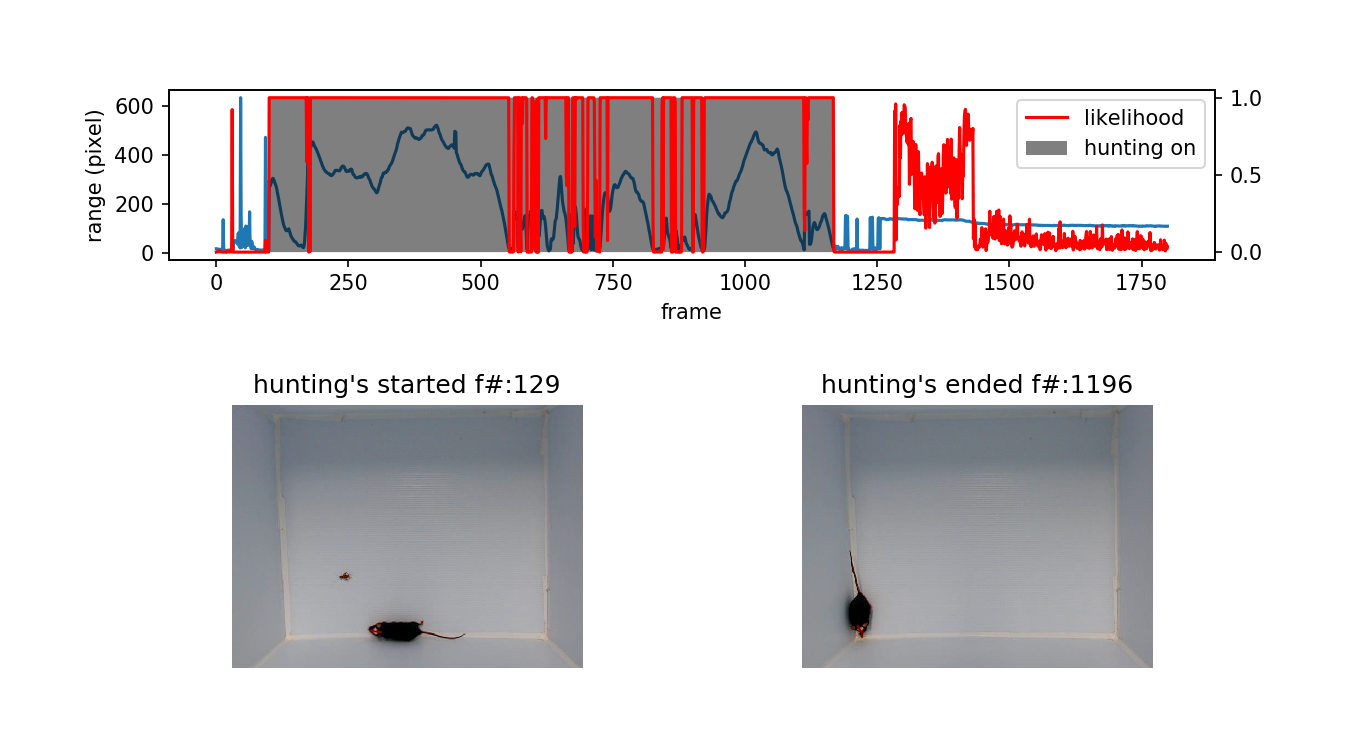

<ipython-input-98-be185961637d>:40: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  matplotlib.pyplot.subplot(2,2,3)
<ipython-input-98-be185961637d>:50: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  matplotlib.pyplot.subplot(2,2,4)


In [98]:
lik_crit = 0.95
window_size = 10
cricket_lik_filt = numpy.vstack(list(
                    map(lambda x: all(cricket_likelihoods[x:x+window_size] > lik_crit), range(num_frames))
                    ))
#acc = numpy.vstack((0, numpy.diff(cricket_speeds, axis=0)));
#cricket_acc_filt = numpy.abs(acc) < acc_crit;

#hunting_start_frame_index = list(map(lambda x,y: x==True, cricket_lik_filt, cricket_acc_filt)).index(True)
hunting_start_frame_index = list(map(lambda x: x==True, cricket_lik_filt)).index(True)
print("hunting_start_frame_index = {0}".format(hunting_start_frame_index))


# Hunting end
#  We will find it in the same fashion as the hunting start but in the reverse of time
cricket_lik_filt_reverse = numpy.vstack(list(
                    map(lambda x: all(cricket_likelihoods[x-window_size:x] > lik_crit), range(num_frames,0,-1))
                    ))
hunting_end_frame_index = num_frames - list(map(lambda x: x==True, cricket_lik_filt_reverse)).index(True) - 1
print("hunting_end_frame_index = {0}".format(hunting_end_frame_index))

# Now we can have a boolean filter where True only if the huting is on
hunt_on_filt = (numpy.vstack(range(num_frames)) >= hunting_start_frame_index) \
             & (numpy.vstack(range(num_frames)) <= hunting_end_frame_index)

# Let's check it out in a plot
matplotlib.pyplot.figure(figsize=(9,5))
ax1 = matplotlib.pyplot.subplot(3,1,1)
matplotlib.pyplot.plot(ranges)
matplotlib.pyplot.xlabel('frame')
matplotlib.pyplot.ylabel('range (pixel)')
ax2 = ax1.twinx()
matplotlib.pyplot.plot(cricket_likelihoods, 'r-')
matplotlib.pyplot.fill_between(range(num_frames), hunt_on_filt[:,0], 0, facecolor='k', alpha = 0.5)
matplotlib.pyplot.legend([ 'likelihood', 'hunting on'])

# And playback the two moments
for repeat in range(3):
    for i in range(-30,30):
        matplotlib.pyplot.subplot(2,2,3)    
        img = mov_frame_images[hunting_start_frame_index+i]
        matplotlib.pyplot.cla()
        matplotlib.pyplot.imshow(img, origin='lower')
        matplotlib.pyplot.axis('off')
        if i < 0:        
            matplotlib.pyplot.title("hunting starts in " + str(-i) +' frames')
        else:
            matplotlib.pyplot.title("hunting's started" + " f#:" + str(hunting_start_frame_index+i))
            
        matplotlib.pyplot.subplot(2,2,4)
        img = mov_frame_images[hunting_end_frame_index+i]
        matplotlib.pyplot.cla()
        matplotlib.pyplot.imshow(img, origin='lower')
        matplotlib.pyplot.axis('off')
        if i < 0:        
            matplotlib.pyplot.title("hunting ends in " + str(-i) + ' frames')
        else:
            matplotlib.pyplot.title("hunting's ended" + " f#:" + str(hunting_end_frame_index+i))
        matplotlib.pyplot.gcf().canvas.draw()

## MODULE 8(2) "CORRECT" THE DATA AND FIND APPROACHES AND CONTACTS
#   Python exercises:
1. To use numpy
2. To use dict and zip
3. To use matplotlib.pyplot


Remember that we want to use cricket dynamics as critera as it contains "spike-y errors". Here we set the threshold of acceleration as 100 based on the magnitude of jumps in cricket speeds we have observed

<IPython.core.display.Javascript object>


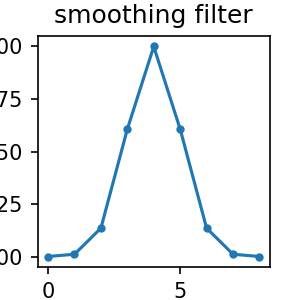

Reminder> speed_cutoff: 5
Reminder> range_cutoff: 40
 
     ## TO-DO'S OR QUESTIONS 
     # 1. EVALUATE THE RESULTS.  
     # 2. IS THERE ANY THING TO IMPROVE?
     


<ipython-input-99-8cfe51094722>:35: RuntimeWarning: invalid value encountered in double_scalars
  y_seg = numpy.sum(data[st:ed,0]*likelihood[st:ed,0]*weight) \


<IPython.core.display.Javascript object>


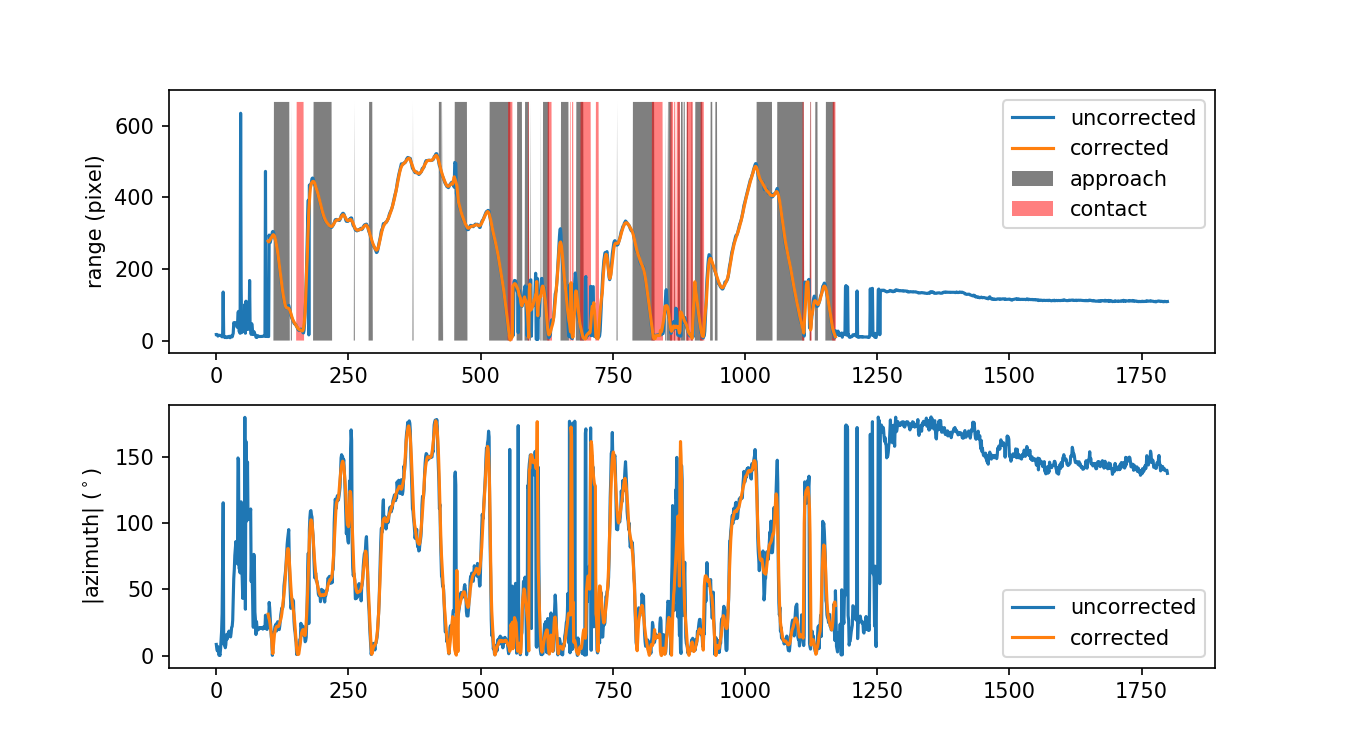

<ipython-input-99-8cfe51094722>:99: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  matplotlib.pyplot.subplot(2,1,1)
<ipython-input-99-8cfe51094722>:105: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  matplotlib.pyplot.subplot(2,1,2)


In [99]:
#frame_indices = numpy.array(range(num_frames))
#frame_filt = (cricket_likelihoods > 0.95) & (tail_likelihoods > 0.95) \
#                & (mycomputedistance(cricket_positions, tail_positions) > 50) \
#                & (numpy.vstack((0, numpy.diff(cricket_speeds, axis = 0))) < 100) \
#                & (numpy.vstack((0, numpy.diff(nose_speeds, axis = 0))) < 100) \
#                & hunt_on_filt

cricket_acceleration_cutoff = 100 

# Also, set a window size for 'smoothing'
window_size = 9

# compute cricket dynamics
cricket_velocities = {'x': numpy.vstack((0, numpy.diff(cricket_positions['x'], axis=0))), 
                      'y': numpy.vstack((0, numpy.diff(cricket_positions['y'], axis=0)))}
cricket_speeds = numpy.sqrt(cricket_velocities['x']**2 + cricket_velocities['y']**2)
cricket_accelerations = numpy.vstack((0, numpy.diff(cricket_speeds, axis=0))) 

# Now, we correct the position data of cricket, nose and head before re-computing range and azimuth based on them
x_gauss = numpy.linspace(-window_size/2,window_size/2, int(window_size))
gauss = numpy.exp(-1/2*numpy.vstack(x_gauss)**2 / (window_size/8)**2)
do_plot_the_gaussian_filter = True  # set it as True if interested
if do_plot_the_gaussian_filter:
    matplotlib.pyplot.figure(figsize=(2,2))
    matplotlib.pyplot.plot(gauss, '.-')
    matplotlib.pyplot.title('smoothing filter')
    
# Define the smoothing function
#  This takes time-series data, time-series likelihood and a local smoothing filter
def mysmoothe(data,likelihood,weight):
    y_smooth = []
    for i in range(len(data)):
        st = i - int(len(weight)/2) # beginning of the segment to integrate
        ed = st + len(weight) - 1   # end of the segment
        y_seg = numpy.sum(data[st:ed,0]*likelihood[st:ed,0]*weight) \
                /numpy.sum(likelihood[st:ed,0]*weight)
        y_smooth.append(y_seg)
    return numpy.vstack(y_smooth)

#mysmoothe = lambda data,likelihood,weight: numpy.vstack(list(
#                    map(lambda i: 
#                        numpy.array(numpy.sum(data[i-5:i+4]*likelihood[i-5:i+4]*weight[:,0])
#                                    /numpy.sum(likelihood[i-5:i+4]*weight[:,0])), 
#                        range(0,len(x)))))


cricket_likelihood_corrected = hunt_on_filt * cricket_likelihoods * (cricket_accelerations < cricket_acceleration_cutoff)
cricket_positions_corrected = [mysmoothe(cricket_positions[key],cricket_likelihood_corrected, gauss) for key in ('x', 'y')]
cricket_positions_corrected = dict(zip(['x', 'y'], cricket_positions_corrected))

nose_positions_corrected = [mysmoothe(nose_positions[key],nose_likelihoods, gauss) for key in ('x', 'y')]
nose_positions_corrected = dict(zip(['x', 'y'], nose_positions_corrected))

head_positions_corrected = [mysmoothe(head_positions[key],head_likelihoods, gauss) for key in ('x', 'y')]
head_positions_corrected = dict(zip(['x', 'y'], head_positions_corrected))

# re-compute range from corrected data
ranges_corrected = mycomputedistance(cricket_positions_corrected,nose_positions_corrected)

# re-compute azimuth from corrected data
#mycomputedisplacement = lambda v0,v1: dict(zip(['x', 'y'], [v1['x']-v0['x'], v1['y']-v0['y']]))
v1 = mycomputedisplacement(head_positions_corrected, nose_positions_corrected) 
v2 = mycomputedisplacement(head_positions_corrected, cricket_positions_corrected)
cos = v1['x']*v2['x'] + v1['y']*v2['y']  # cosine/dot product between [x1, y1] and [x2, y2]
sin = v1['x']*v2['y'] - v1['y']*v2['x']  # sine/determinant
azimuths_corrected = numpy.arctan2(sin, cos)  # atan2(sin, cos)
abs_azimuths_corrected = numpy.arccos(numpy.cos(azimuths_corrected))

# find approaches & contacts
nose_velocities_corrected = {'x': numpy.vstack((0, numpy.diff(nose_positions_corrected['x'], axis=0))), 
                      'y': numpy.vstack((0, numpy.diff(nose_positions_corrected['y'], axis=0)))}
nose_speeds_corrected = numpy.sqrt(nose_velocities_corrected['x']**2 + nose_velocities_corrected['y']**2)

print('Reminder> speed_cutoff: {0}'.format(speed_cutoff))
print('Reminder> range_cutoff: {0}'.format(range_cutoff))
is_approach = (numpy.vstack((0, numpy.diff(ranges_corrected, axis=0))) <= 0)  & (nose_speeds_corrected >= speed_cutoff)
is_contact = (ranges_corrected <= range_cutoff)

# plot

print(" \n \
    ## TO-DO'S OR QUESTIONS \n \
    # 1. EVALUATE THE RESULTS.  \n \
    # 2. IS THERE ANY THING TO IMPROVE?\n \
    ")

matplotlib.pyplot.figure(figsize = (9,5))
matplotlib.pyplot.subplot(2,1,1)
matplotlib.pyplot.plot(ranges)
matplotlib.pyplot.plot(ranges_corrected, '-')
matplotlib.pyplot.ylabel('range (pixel)')

matplotlib.pyplot.subplot(2,1,2)
matplotlib.pyplot.plot(abs_azimuths*180/numpy.pi)
matplotlib.pyplot.plot(abs_azimuths_corrected*180/numpy.pi, '-')
matplotlib.pyplot.ylabel('|azimuth| ($^\circ$)')


matplotlib.pyplot.subplot(2,1,1)
bottom, top = matplotlib.pyplot.ylim()
matplotlib.pyplot.fill_between(range(0, num_frames), is_approach[:,0]*top, 0, facecolor='k', alpha = 0.5)
matplotlib.pyplot.fill_between(range(0, num_frames), is_contact[:,0]*top, 0, facecolor='r', alpha = 0.5)
matplotlib.pyplot.legend(['uncorrected', 'corrected', 'approach', 'contact'])

matplotlib.pyplot.subplot(2,1,2)
matplotlib.pyplot.legend(['uncorrected', 'corrected'])